In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
df = pd.read_csv('../data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

/Users/oksjjj/coding/prophet/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


07:20:42 - cmdstanpy - INFO - Chain [1] start processing
07:20:42 - cmdstanpy - INFO - Chain [1] done processing


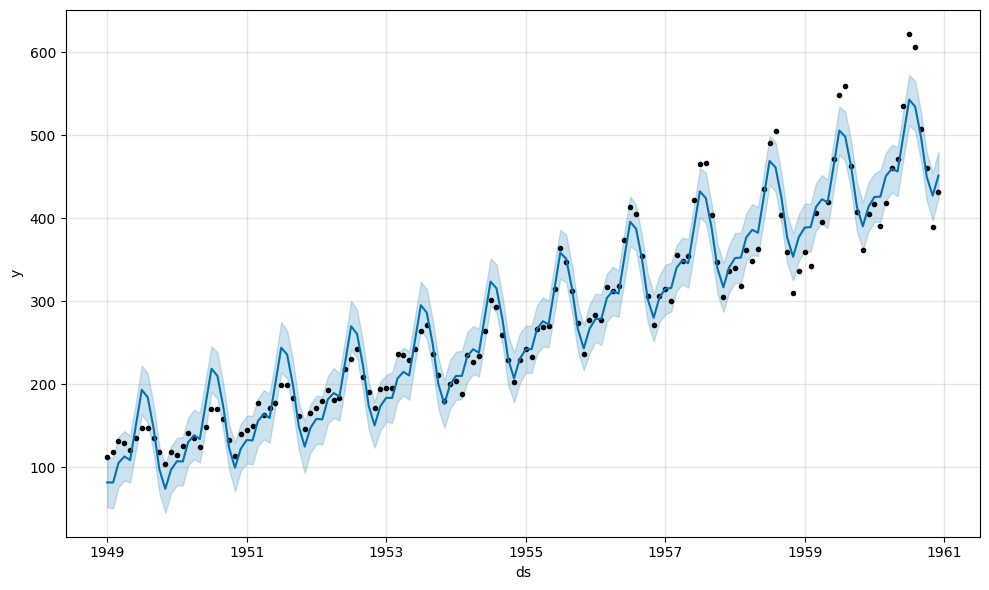

In [2]:
model_a = Prophet(seasonality_mode='additive',
                  yearly_seasonality=4)
model_a.fit(df)
forecast_a = model_a.predict()
fig_a = model_a.plot(forecast_a)
plt.show()

07:20:42 - cmdstanpy - INFO - Chain [1] start processing
07:20:43 - cmdstanpy - INFO - Chain [1] done processing


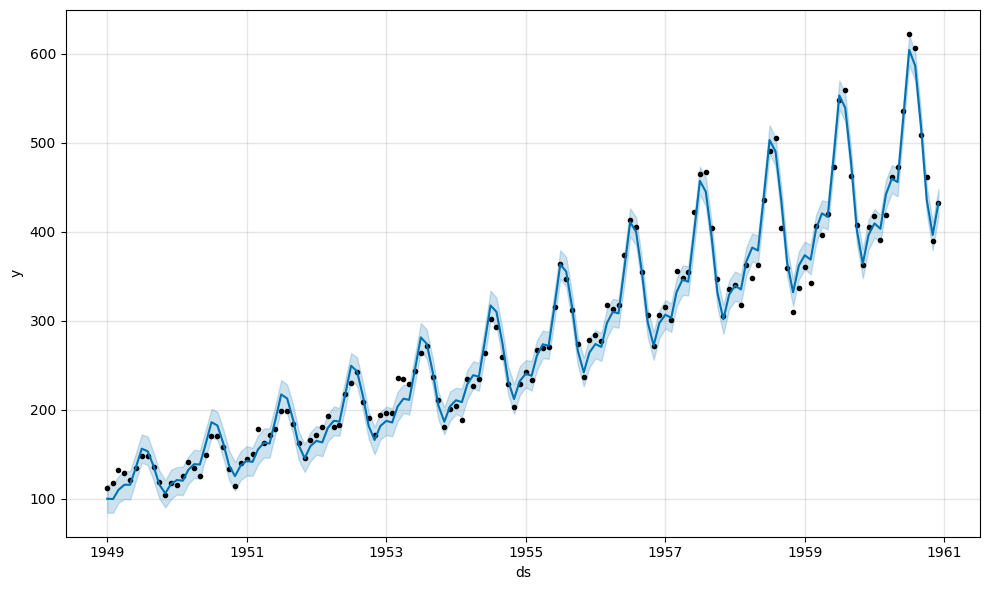

In [3]:
model_m = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=4)
model_m.fit(df)
forecast_m = model_m.predict()
fig_m = model_m.plot(forecast_m)
plt.show()

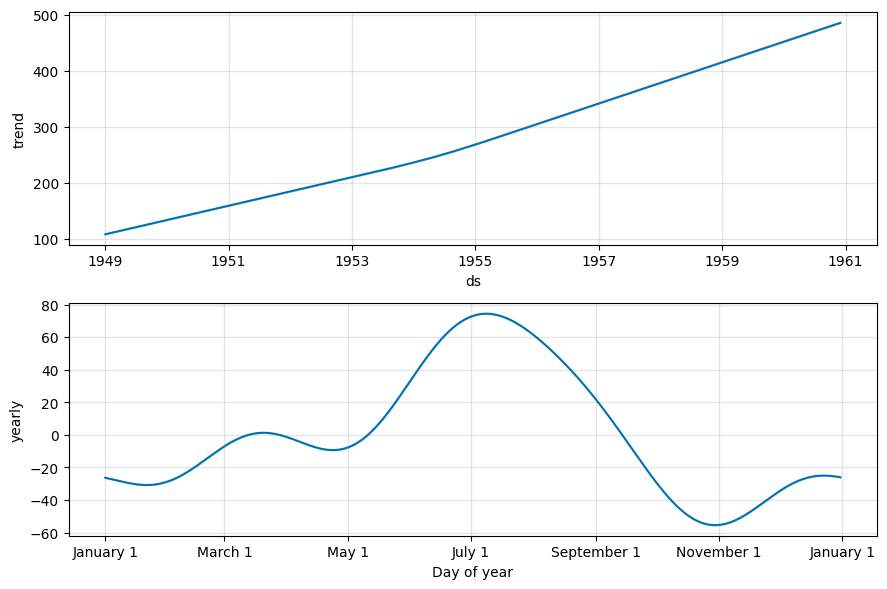

In [4]:
fig_a2 = model_a.plot_components(forecast_a)
plt.show()

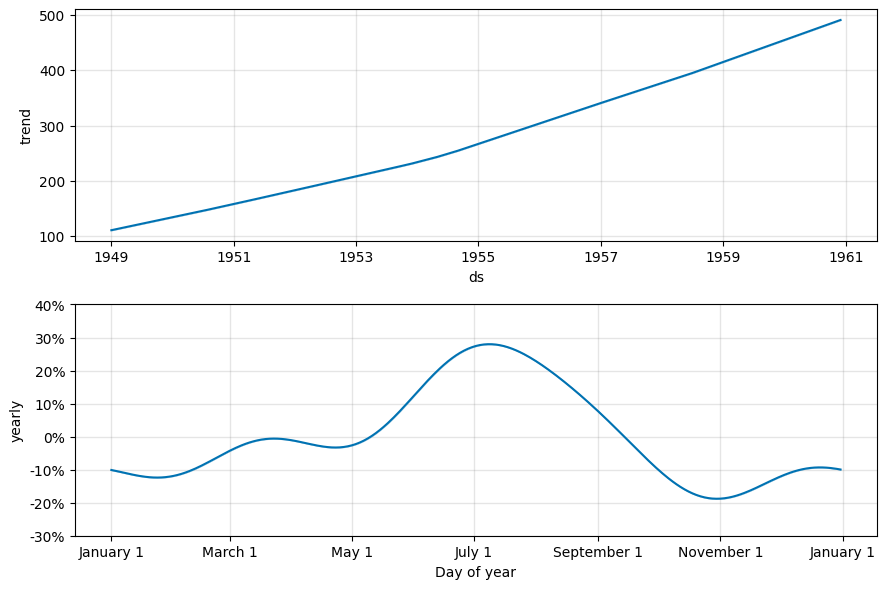

In [5]:
fig_m2 = model_m.plot_components(forecast_m)
plt.show()

In [6]:
df = pd.read_csv('../data/divvy_daily.csv')
df.head()

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow


In [7]:
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [8]:
df

,ds,y
0,2014-01-01,95
1,2014-01-02,111
2,2014-01-03,6
3,2014-01-04,181
4,2014-01-05,32
...,...,...
1453,2017-12-27,1117
1454,2017-12-28,1267
1455,2017-12-29,1049
1456,2017-12-30,519


07:20:43 - cmdstanpy - INFO - Chain [1] start processing
07:20:43 - cmdstanpy - INFO - Chain [1] done processing


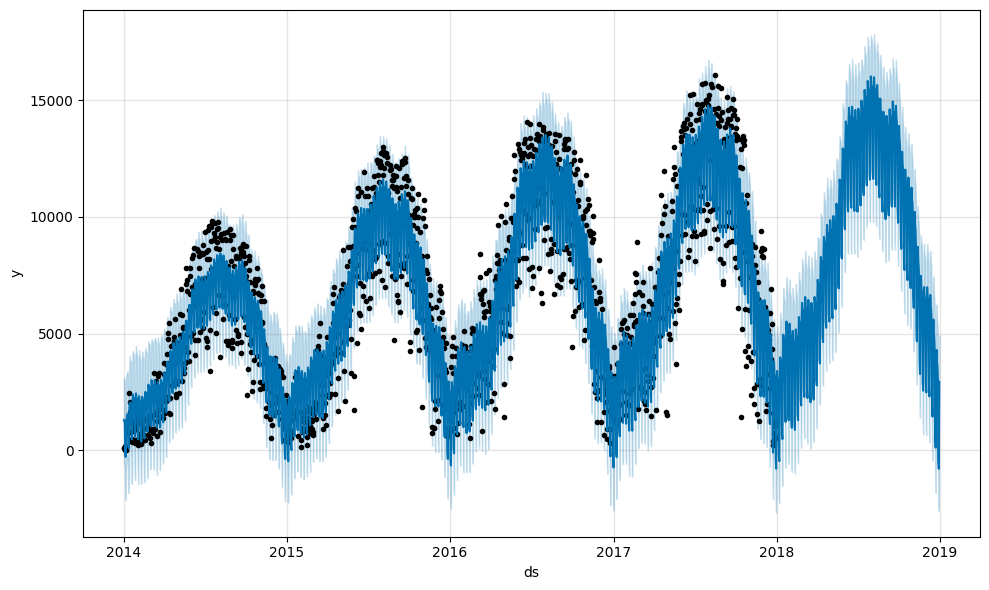

In [9]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

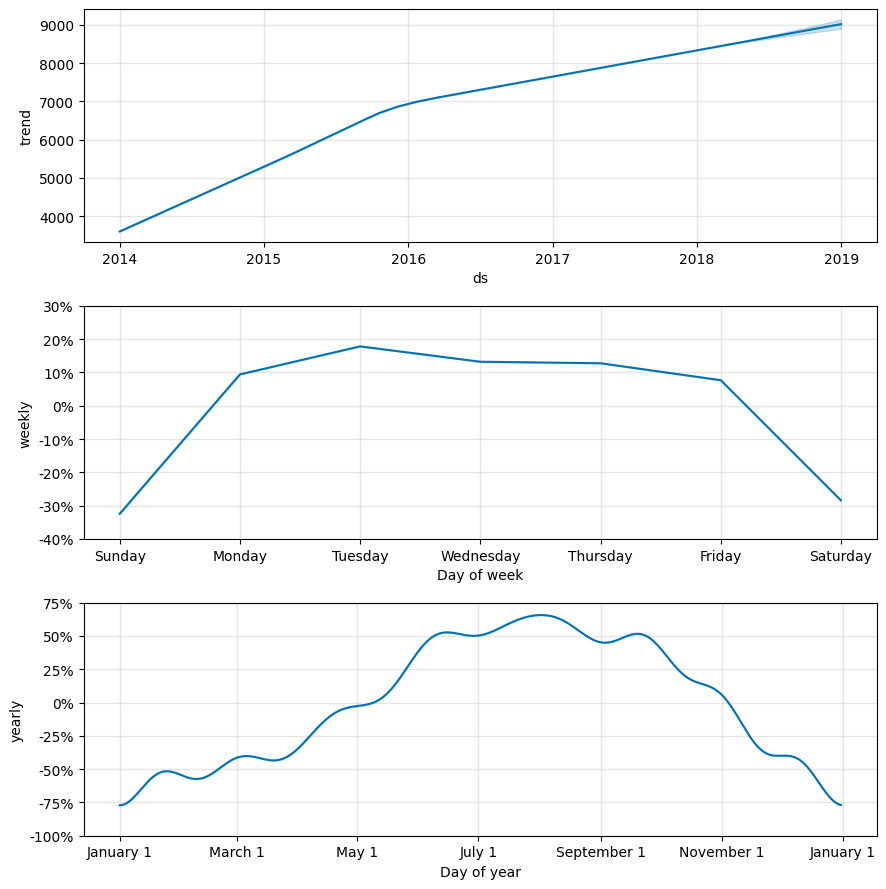

In [10]:
fig2 = model.plot_components(forecast)
plt.show()

In [11]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.fit(df)

07:20:44 - cmdstanpy - INFO - Chain [1] start processing
07:20:44 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
from prophet.plot import plot_yearly

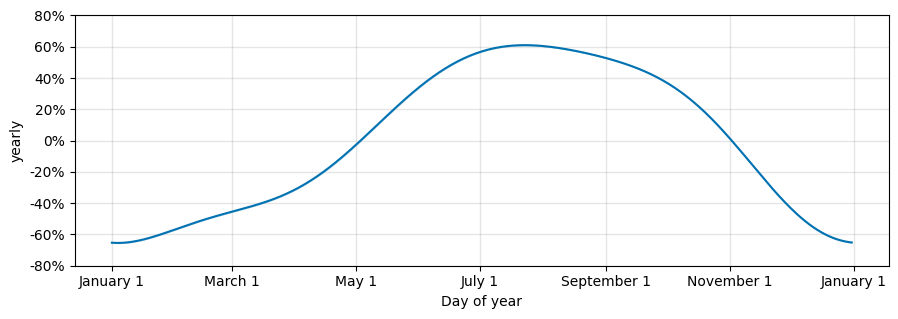

In [13]:
fig3 = plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

In [14]:
df = pd.read_csv('../data/sunspots.csv',\
                 usecols=['Date', 'Monthly Mean Total Sunspot Number'])

# 날짜 형식별로 처리
def convert_date(date_str):
    try:
        # YYYY-MM-DD 형식
        return pd.to_datetime(date_str)
    except ValueError:
        # MM/DD/YYYY 형식
        return pd.to_datetime(date_str, format='%m/%d/%Y')

# 날짜 열에 적용
df['Date'] = df['Date'].apply(convert_date)
df.columns = ['ds', 'y']

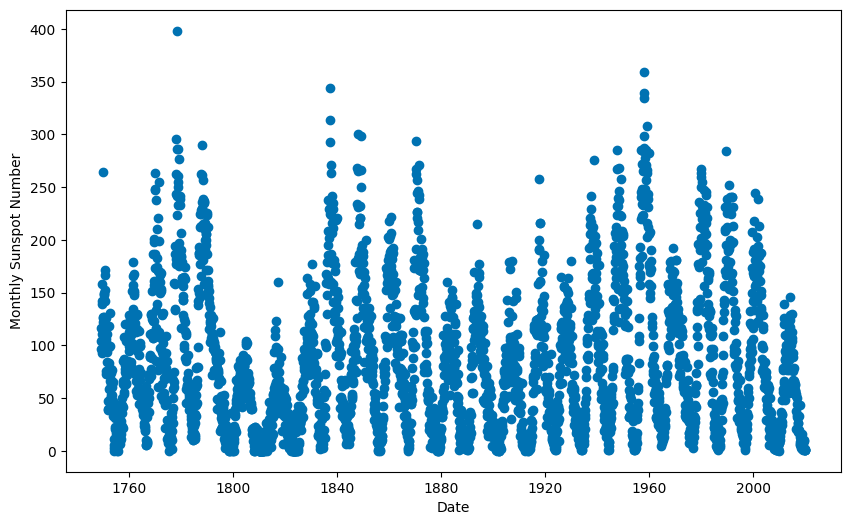

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Monthly Sunspot Number')
plt.show()

In [16]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=False)

In [17]:
model.add_seasonality(name='11-year cycle',
                      period=11*365.25,
                      fourier_order=5)

07:20:44 - cmdstanpy - INFO - Chain [1] start processing
07:20:45 - cmdstanpy - INFO - Chain [1] done processing
/Users/oksjjj/coding/prophet/.venv/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


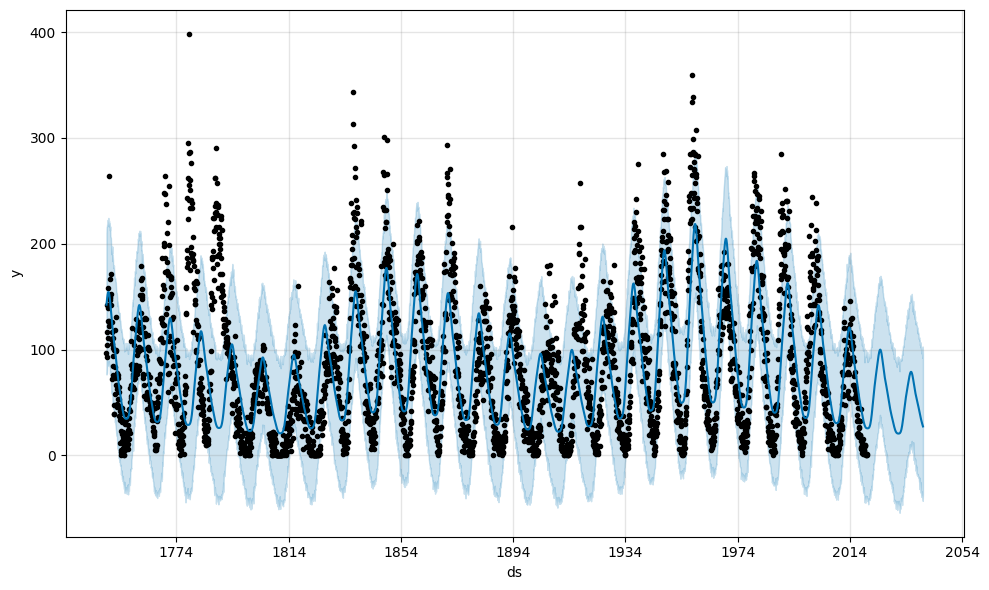

In [18]:
model.fit(df)
future = model.make_future_dataframe(periods=240, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

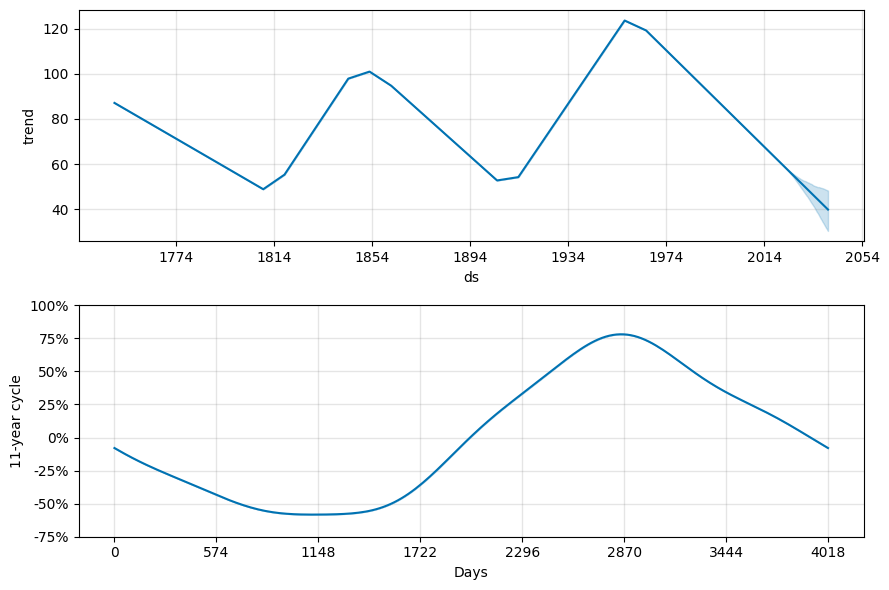

In [19]:
fig2 = model.plot_components(forecast)
plt.show()

In [20]:
model.seasonalities

OrderedDict([('11-year cycle',
              {'period': 4017.75,
               'fourier_order': 5,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [21]:
df = pd.read_csv('../data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [22]:
def is_weekend(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5 or date.dayofweek == 6)
df['weekend'] = df['ds'].apply(is_weekend)
df['weekday'] = ~df['ds'].apply(is_weekend)
df.head()

,ds,y,weekend,weekday
0,2014-01-01 01:00:00,1,False,True
1,2014-01-01 02:00:00,9,False,True
2,2014-01-01 03:00:00,4,False,True
3,2014-01-01 04:00:00,1,False,True
4,2014-01-01 07:00:00,2,False,True


In [23]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6,
                weekly_seasonality=6,
                daily_seasonality=False)

In [24]:
model.add_seasonality(name='daily_weekend',
                      period=1,
                      fourier_order=3,
                      condition_name='weekend')
model.add_seasonality(name='daily_weekday',
                      period=1,
                      fourier_order=3,
                      condition_name='weekday')

In [25]:
model.fit(df)
future = model.make_future_dataframe(periods=365*24,
                                     freq='h')
future['weekend'] = future['ds'].apply(is_weekend)
future['weekday'] = ~future['ds'].apply(is_weekend)
forecast = model.predict(future)

07:20:47 - cmdstanpy - INFO - Chain [1] start processing
07:20:57 - cmdstanpy - INFO - Chain [1] done processing


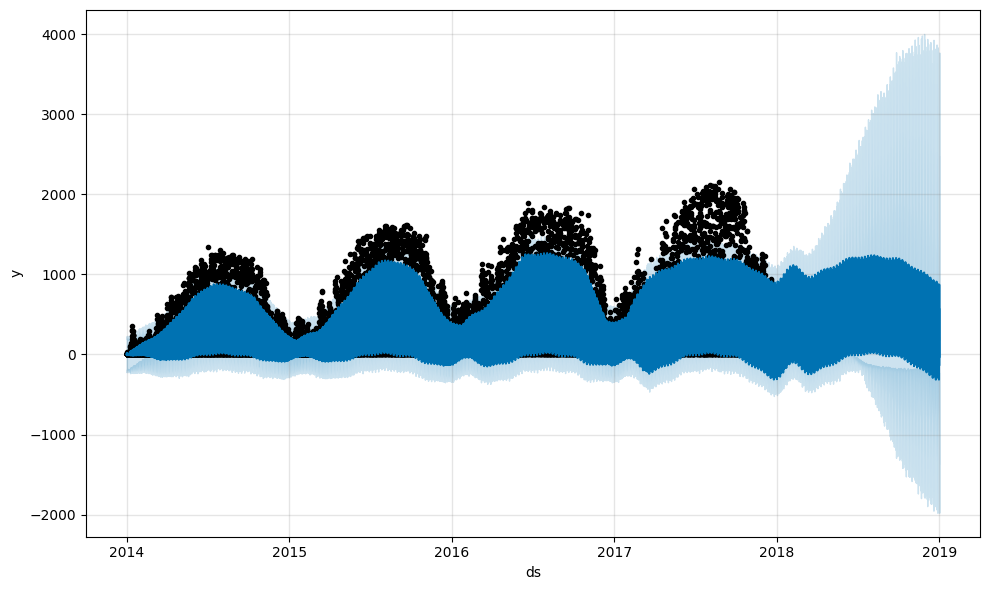

In [26]:
fig = model.plot(forecast)
plt.show()

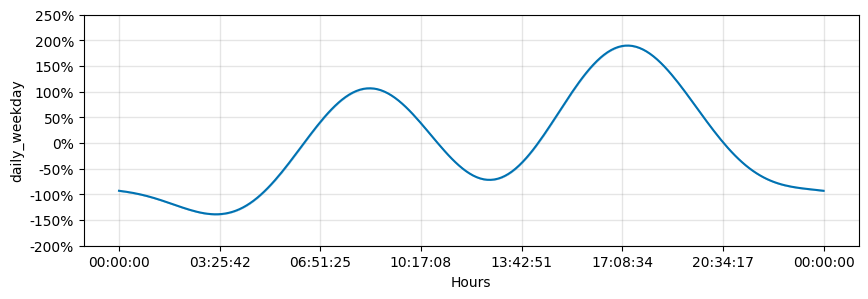

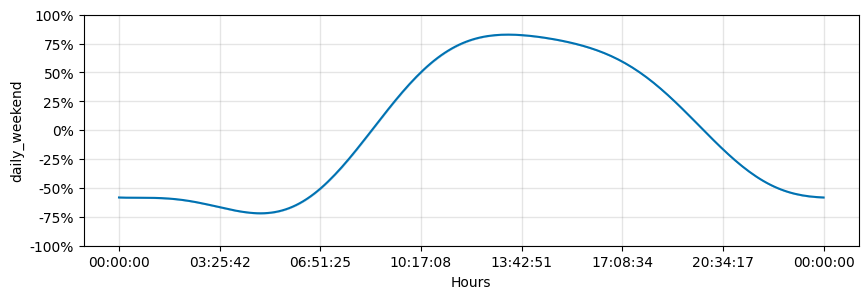

In [27]:
from prophet.plot import plot_seasonality
fig3 = plot_seasonality(model, 'daily_weekday',
                        figsize=(10, 3))
plt.show()
fig4 = plot_seasonality(model, 'daily_weekend',
                        figsize=(10, 3))
plt.show()

In [28]:
df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [29]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=.01)

07:21:01 - cmdstanpy - INFO - Chain [1] start processing
07:21:01 - cmdstanpy - INFO - Chain [1] done processing


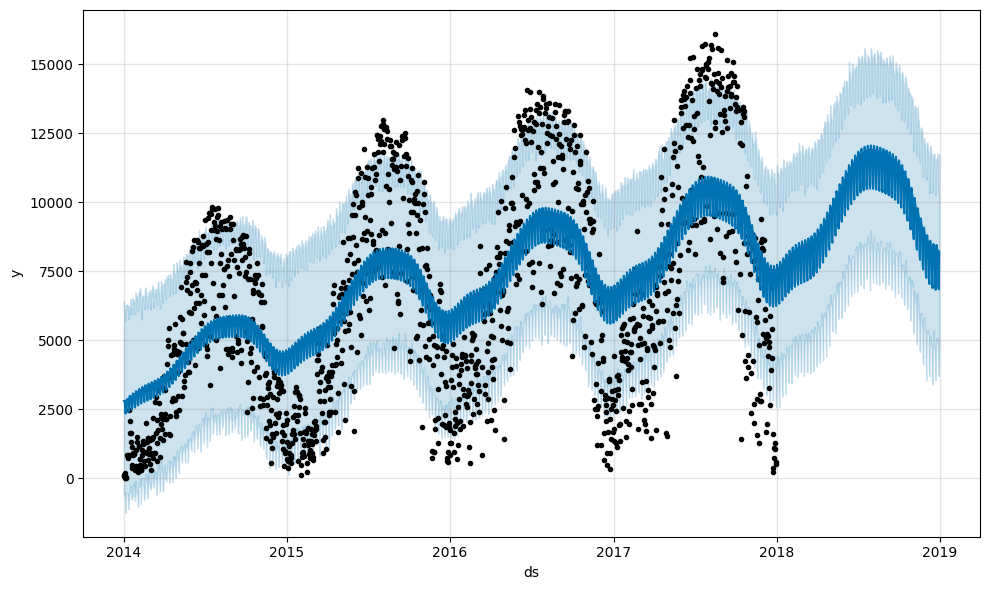

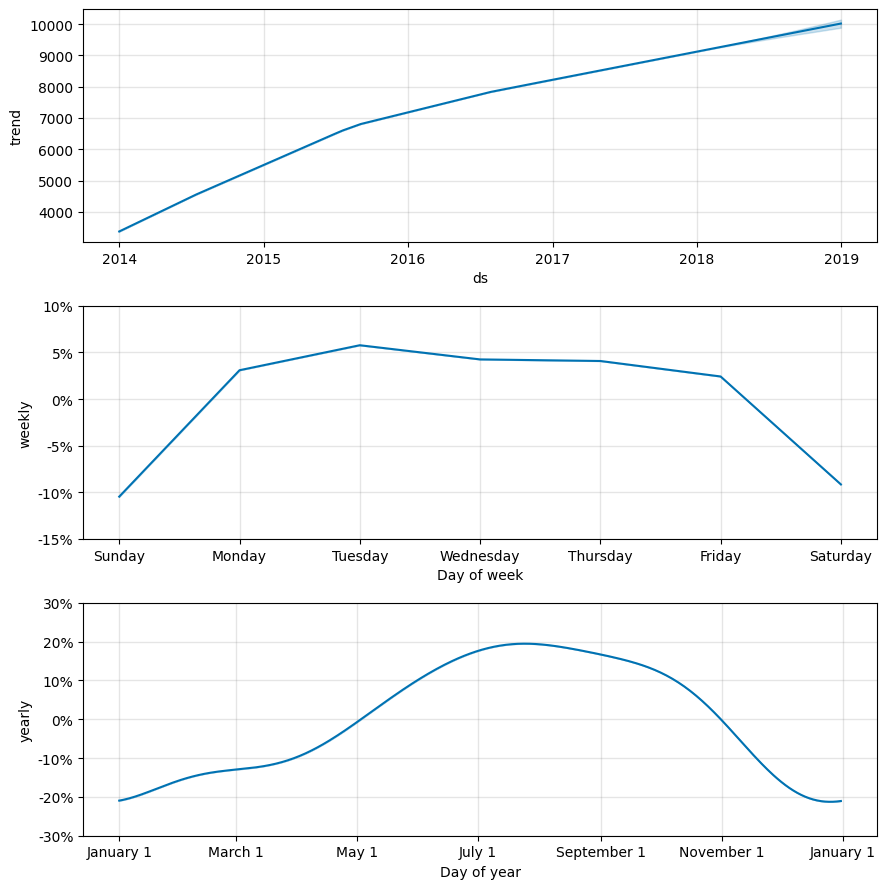

In [30]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [31]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                weekly_seasonality=False)

In [32]:
model.add_seasonality(name='weekly',
                      period=7,
                      fourier_order=4,
                      prior_scale=0.01)

07:21:02 - cmdstanpy - INFO - Chain [1] start processing
07:21:02 - cmdstanpy - INFO - Chain [1] done processing


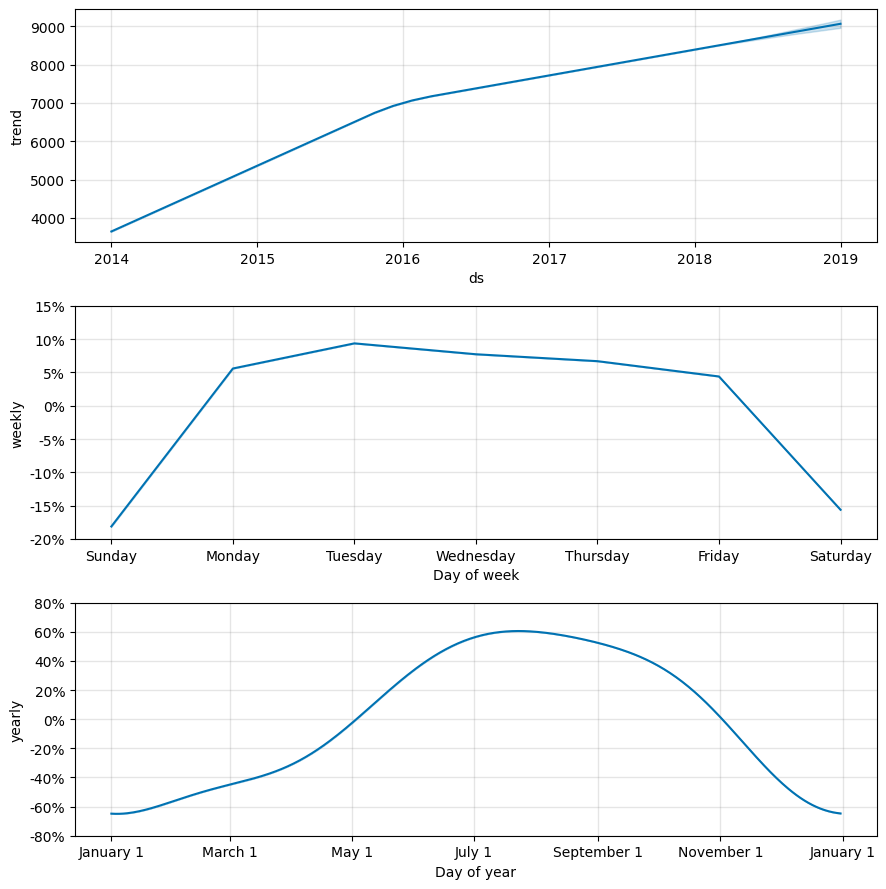

In [33]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()